CNN hyperparameter 변경하며 결과 보는 노트북


https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d

in_channels: 입력의 채널 수

out_channels: 출력의 채널 수

kernel_size: 필터 혹은 커널의 크기

stride: 필터 적용의 간격 (stride: 걸음걸이)

padding: 입력 데이터를 추가적으로 둘러싸는 층의 두께

dilation: (https://laonple.blog.me/220991967450)

groups: 입력을 채널 단위로 몇개의 분리된 
그룹으로 볼 것인가

bias: 편차의 사용여부

padding_mode: 패딩 적용 방식 (ex. zero padding은 0으로 채우는 경우)

## Settings

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
mnist_train = dset.MNIST("../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)

0it [00:00, ?it/s]

9920512it [00:01, 8733195.78it/s]                            


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130799.69it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw


1654784it [00:00, 2234127.28it/s]                           
0it [00:00, ?it/s]

Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw


8192it [00:00, 48424.08it/s]            

Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw
Processing...
Done!


In [3]:
print(mnist_train)

# dataset.__getitem__(idx)
image,label = mnist_train.__getitem__(0)
print(image.size(),label)

# dataset[idx]
image,label = mnist_train[0]
print(image.size(),label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5


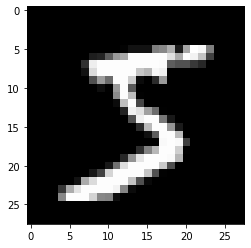

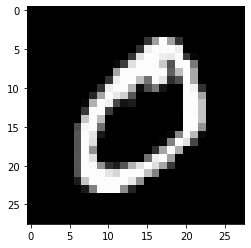

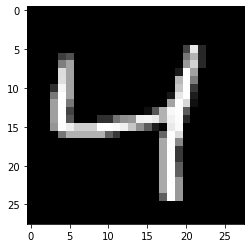

In [4]:
for i in range(3):
    img= mnist_train[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

## Channels change

In [51]:
mnist_train.__getitem__(0) # == mnist_train[0]

2

In [47]:
mnist_train.__getitem__(0)[0].shape

torch.Size([1, 28, 28])

In [56]:
len(mnist_train.__getitem__(1)) #== mnist_train.__getitem__(1).__len__()

2

In [57]:
mnist_train.__getitem__(1).__len__()

2

In [60]:
mnist_train.__len__()

60000

torch.Size([1, 3, 28, 28])


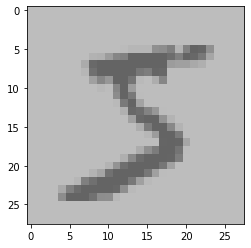

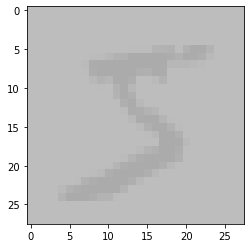

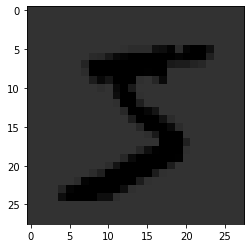

In [66]:
# 트레이닝 데이터의 이미지-라벨 쌍을 불러옴
image, label = mnist_train[0]

## Conv2d 연산을 할 수 있도록 1 * 1 * 28 * 28(batch, color, width, height)
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
# image.size() = 1, 1, 28

# 1개의 채널을 입력으로 받아서 3개의 채널이 나오는 컨볼루션 연산 정의
# 1, 28, 28 -> 3, 28, 28
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 1)

# 연산에 입력 이미지를 넣음
output = conv_layer(image)

# 결과 확인

print(output.size())

for i in range(output.size()[1]):
  plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray',vmin=-1,vmax=1)
  plt.show()

## Kernel Size

In [68]:
output.shape

torch.Size([1, 3, 28, 28])

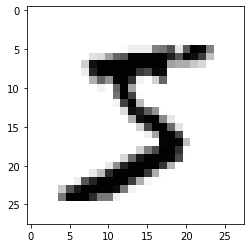

kernel size 1, result size: torch.Size([1, 1, 28, 28])


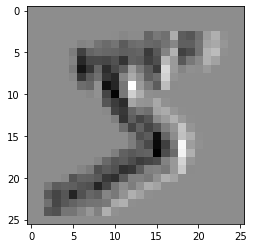

kernel size 3, result size: torch.Size([1, 1, 26, 26])


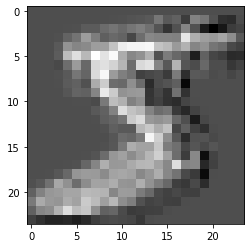

kernel size 5, result size: torch.Size([1, 1, 24, 24])


In [78]:
# 굴빡해짐
# kernel size 1

conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1,kernel_size = 1)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('kernel size 1, result size: {}'.format(output.size()))

# kernel size 3
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1,kernel_size = 3)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('kernel size 3, result size: {}'.format(output.size()))

# kernel size 5
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1,kernel_size = 5)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('kernel size 5, result size: {}'.format(output.size()))

In [83]:
output[0, 0, :, :][0]

tensor([-0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363,
        -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363,
        -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363],
       grad_fn=<SelectBackward>)

In [84]:
output[0, 0, :, :].data[0]

tensor([-0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363,
        -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363,
        -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363, -0.1363])

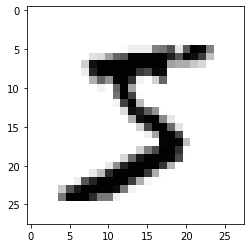

stride size 1, result size: torch.Size([1, 1, 28, 28])


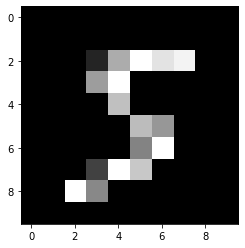

stride size 3, result size: torch.Size([1, 1, 10, 10])


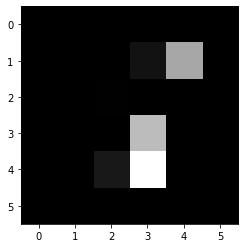

stride size 5, result size: torch.Size([1, 1, 6, 6])


In [89]:
# 흐릿흐릿
# stride size 1
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1,kernel_size = 1, stride = 1)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('stride size 1, result size: {}'.format(output.size()))

# kernel size 3
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1,kernel_size = 1, stride = 3)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('stride size 3, result size: {}'.format(output.size()))

# kernel size 5
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1,kernel_size = 1, stride = 5)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('stride size 5, result size: {}'.format(output.size()))

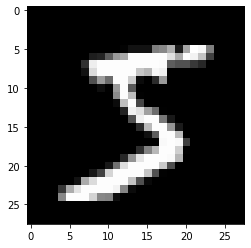

padding size 1, result size: torch.Size([1, 1, 28, 28])


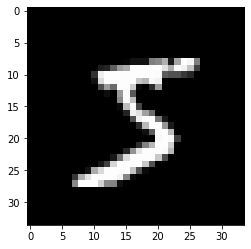

padding size 3, result size: torch.Size([1, 1, 34, 34])


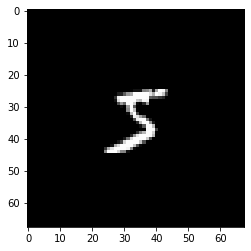

padding size 6, result size: torch.Size([1, 1, 68, 68])


In [93]:
# 사진이 적어지면서 고해상도가 됨
# padding size 1

conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1, kernel_size = 1, padding = 0)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('padding size 1, result size: {}'.format(output.size()))

# padding size 3
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1, kernel_size = 1, padding = 3)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('padding size 3, result size: {}'.format(output.size()))

# padding size 20
conv_layer = nn.Conv2d(in_channels = 1,out_channels = 1, kernel_size = 1, padding = 20)
output = conv_layer(image)
plt.imshow(output[0, 0, :, :].data.numpy(),cmap='gray')
plt.show()
print('padding size 20, result size: {}'.format(output.size()))